# 밑준비

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os


os.chdir('/content/drive/MyDrive/Colab Notebooks/수업/20220126/')

In [ ]:
df = pd.read_csv('./data/train.csv')

In [ ]:
df.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_l

## one-hot encoding col 통합 + 불필요한 feature 제거

In [ ]:
def make_dataframe(dataframe, train=True):
    # 고용 연수 col 생성
    dataframe['emp_length'] = 1 * dataframe['emp_length2'] + 2 * dataframe['emp_length3'] + 3 * dataframe['emp_length4'] + 4 * dataframe['emp_length5']\
                + 5 * dataframe['emp_length6'] + 6 * dataframe['emp_length7'] + 7 * dataframe['emp_length8'] + 8 * dataframe['emp_length9'] + 9 * dataframe['emp_length10']\
                + 10 * dataframe['emp_length11'] + 11 * dataframe['emp_length12']
    
    # 최초 대출 상태 col 생성
    dataframe['initial_list_status'] = dataframe['initial_list_status2']

    # 마지막 체납 col 생성
    dataframe['mths_since_last_delinq'] = dataframe['mths_since_last_delinq1'] + 2 * dataframe['mths_since_last_delinq2'] + 3 * dataframe['mths_since_last_delinq3']\
                                    + 4 * dataframe['mths_since_last_delinq4'] + 5 * dataframe['mths_since_last_delinq5'] + 6 * dataframe['mths_since_last_delinq6']\
                                    + 7 * dataframe['mths_since_last_delinq7'] + 8 * dataframe['mths_since_last_delinq8'] + 9 * dataframe['mths_since_last_delinq9']\
                                    + 10 * dataframe['mths_since_last_delinq10'] + 11 * dataframe['mths_since_last_delinq11']
    
    if train:
        dataframe = dataframe[
                ['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
                 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
                 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
                 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length',
                 'home_ownership1', 'home_ownership2', 'home_ownership3', 'home_ownership4',
                 'home_ownership5', 'home_ownership6', 'verification_status1', 'verification_status2',
                 'verification_status3', 'pub_rec', 'purpose1', 'purpose2', 'purpose3', 'purpose4',
                 'purpose5', 'purpose6', 'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11',
                 'purpose12', 'purpose13', 'purpose14', 'initial_list_status', 'mths_since_last_delinq',
                 'funded_amnt', 'total_rec_late_fee', 'term1', 'open_acc',
                 'installment', 'revol_util', 'out_prncp', 'total_rec_int', 'fico_range_low',
                 'depvar']
                ]
    
    else:
        dataframe = dataframe[
                ['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
                 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
                 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
                 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length',
                 'home_ownership1', 'home_ownership2', 'home_ownership3', 'home_ownership4',
                 'home_ownership5', 'home_ownership6', 'verification_status1', 'verification_status2',
                 'verification_status3', 'pub_rec', 'purpose1', 'purpose2', 'purpose3', 'purpose4',
                 'purpose5', 'purpose6', 'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11',
                 'purpose12', 'purpose13', 'purpose14', 'initial_list_status', 'mths_since_last_delinq',
                 'funded_amnt', 'total_rec_late_fee', 'term1', 'open_acc',
                 'installment', 'revol_util', 'out_prncp', 'total_rec_int', 'fico_range_low']
                ]
    
    return dataframe

In [ ]:
outliar_target_features = ['annual_inc', 'revol_bal', 'total_acc',
                   'tot_cur_bal', 'funded_amnt','open_acc', 'revol_util']
                   

In [ ]:
norm_target_features = ['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'funded_amnt',
       'total_rec_late_fee', 'open_acc', 'installment', 'revol_util',
       'out_prncp', 'total_rec_int', 'fico_range_low']

In [ ]:
train_df = make_dataframe(df)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100000 non-null  float64
 1   annual_inc                  100000 non-null  float64
 2   dti                         100000 non-null  float64
 3   delinq_2yrs                 100000 non-null  int64  
 4   inq_last_6mths              100000 non-null  int64  
 5   revol_bal                   100000 non-null  int64  
 6   total_acc                   100000 non-null  int64  
 7   collections_12_mths_ex_med  100000 non-null  int64  
 8   acc_now_delinq              100000 non-null  int64  
 9   tot_coll_amt                100000 non-null  int64  
 10  tot_cur_bal                 100000 non-null  int64  
 11  chargeoff_within_12_mths    100000 non-null  int64  
 12  delinq_amnt                 100000 non-null  int64  
 13  tax_liens      

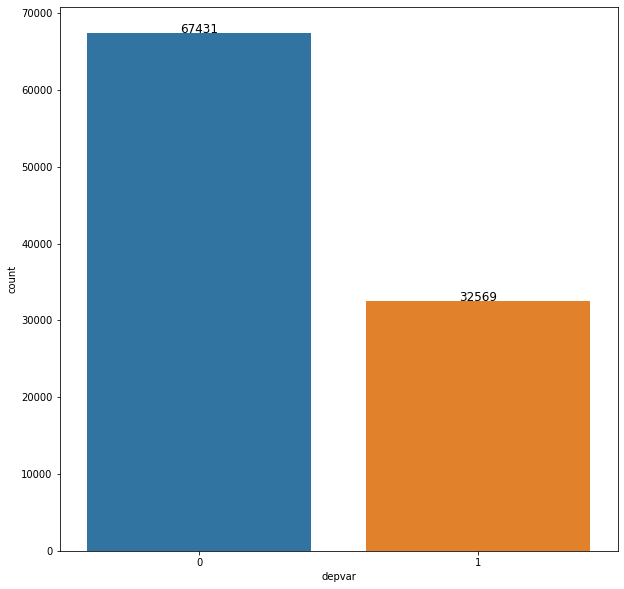

In [ ]:
# 목표 변수 분포 확인(부도 여부)
plt.figure(figsize=(10,10))
ax = sns.countplot(x='depvar', data=train_df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, p.get_height(), ha = 'center', size = 12)

plt.show()

## 이상치 제거

### 원본 데이터 저장

In [ ]:
origin_X = train_df.drop('depvar', axis=1)
origin_y = train_df['depvar']

### 이상치 검출

In [ ]:
target_index = []

for col in outliar_target_features:
    target_col = train_df[col]
    quantile_25 = np.percentile(target_col.values, 25)
    quantile_75 = np.percentile(target_col.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * 1.5

    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = target_col[(target_col < lowest_val) | (target_col > highest_val)].index
    print(col, '이상치 데이터 인덱스:', outlier_index)
    print('이상치 개수:', len(outlier_index))
    print('이상치 기준:', lowest_val, highest_val)
    print()

    target_index += list(outlier_index)

target_index = set(target_index)

print('제거할 데이터 개수:',len(target_index))

annual_inc 이상치 데이터 인덱스: Int64Index([   26,    35,    43,    81,    84,   113,   124,   145,   181,
              193,
            ...
            99608, 99638, 99709, 99711, 99749, 99780, 99836, 99956, 99986,
            99990],
           dtype='int64', length=4611)
이상치 개수: 4611
이상치 기준: -22500.0 157500.0

revol_bal 이상치 데이터 인덱스: Int64Index([   19,    22,    26,    60,    67,    81,    84,    85,   113,
              124,
            ...
            99792, 99796, 99859, 99879, 99882, 99958, 99966, 99968, 99974,
            99986],
           dtype='int64', length=5980)
이상치 개수: 5980
이상치 기준: -14287.5 39836.5

total_acc 이상치 데이터 인덱스: Int64Index([   60,    81,   154,   162,   169,   187,   219,   234,   298,
              396,
            ...
            99513, 99544, 99625, 99646, 99726, 99727, 99879, 99907, 99978,
            99986],
           dtype='int64', length=2215)
이상치 개수: 2215
이상치 기준: -6.5 53.5

tot_cur_bal 이상치 데이터 인덱스: Int64Index([   73,    78,    81,    84,   113,   172,   181,  

In [ ]:
# 이상치 제거
print(len(train_df))
train_df = train_df.drop(target_index)
print(len(train_df))

100000
85526


### 제거 후 분포 확인

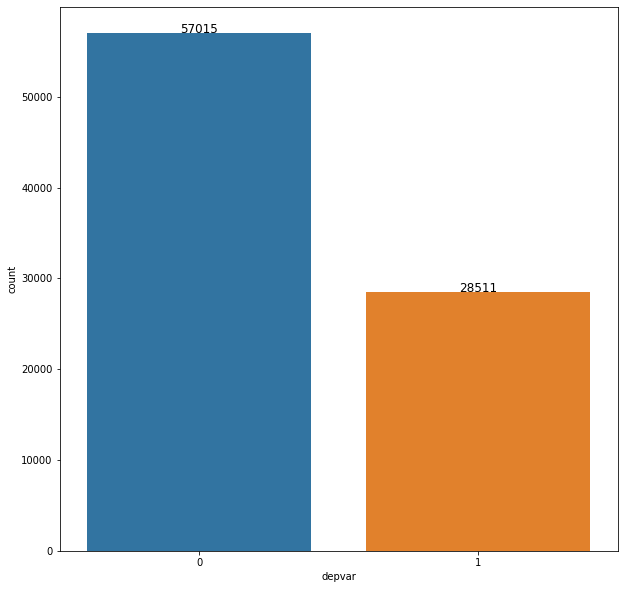

In [ ]:
# 목표 변수 분포 확인(부도 여부)
plt.figure(figsize=(10,10))
ax = sns.countplot(x='depvar', data=train_df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, p.get_height(), ha = 'center', size = 12)

plt.show()

## test data set 생성

In [ ]:
X = train_df.drop('depvar', axis=1)
y = train_df['depvar']

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29, stratify=y)

## 스케일링

### train set

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X_train[norm_target_features])

X_train[norm_target_features] = scaled_features

In [ ]:
X_train

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,pub_rec,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status,mths_since_last_delinq,funded_amnt,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,total_rec_int,fico_range_low
54778,0.201402,0.194821,0.504907,0.055556,0.333333,0.123892,0.509804,0.0,0.0,0.000450,0.083285,0.0,0.0,0.0,5,0,0,0,0,0,1,0,1,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0.027759,2.633103e-12,1,0.318182,0.028199,0.351821,0.0,0.005736,0.108108
45943,0.080639,0.316419,0.367114,0.111111,0.000000,0.262245,0.470588,0.0,0.0,0.001770,0.590032,0.0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,0.138793,1.974828e-02,1,0.772727,0.110370,0.400662,0.0,0.025045,0.027027
6650,0.427347,0.313133,0.480673,0.000000,0.000000,0.334823,0.411765,0.0,0.0,0.000000,0.340481,0.0,0.0,0.0,6,0,1,0,0,0,0,0,1,0,0.015873,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11,0.471895,2.633103e-12,0,0.500000,0.282494,0.365894,0.0,0.209244,0.108108
14139,0.241917,0.190877,0.318045,0.111111,0.000000,0.241182,0.411765,0.0,0.0,0.000000,0.366522,0.0,0.0,0.0,1,0,0,0,0,0,1,1,0,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,3,0.449688,2.633103e-12,1,0.500000,0.368451,0.197020,0.0,0.115350,0.189189
28532,0.318270,0.589194,0.383537,0.000000,0.000000,0.437677,0.509804,0.0,0.0,0.000000,0.979825,0.0,0.0,0.0,1,0,1,0,0,0,0,1,0,0,0.015873,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.111034,2.633103e-12,1,0.545455,0.099074,0.584437,0.0,0.015078,0.054054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78279,0.100117,0.286841,0.351692,0.000000,0.166667,0.340723,0.254902,0.0,0.0,0.000000,0.268491,0.0,0.0,0.0,11,0,1,0,0,0,0,0,0,1,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.527412,2.633103e-12,1,0.272727,0.407918,0.499172,0.0,0.075822,0.378378
92884,0.357226,0.293414,0.193271,0.055556,0.000000,0.229609,0.235294,0.0,0.0,0.000000,0.020546,0.0,0.0,0.0,2,0,0,0,0,0,1,1,0,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,0.305344,2.633103e-12,1,0.545455,0.263864,0.485099,0.0,0.102518,0.000000
18531,0.212700,0.161956,0.255558,0.000000,0.166667,0.081566,0.509804,0.0,0.0,0.000000,0.016527,0.0,0.0,0.0,1,0,0,0,0,0,1,0,1,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,7,0.249827,2.633103e-12,1,0.318182,0.205185,0.203642,0.0,0.049442,0.216216
60634,0.162446,0.457736,0.050270,0.000000,0.000000,0.204931,0.372549,0.0,0.0,0.000000,0.626615,0.0,0.0,0.0,1,0,1,0,0,0,0,1,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.388619,2.633103e-12,1,0.136364,0.309528,0.381623,0.0,0.082028,0.432432


### test set

In [ ]:
scaled_features = scaler.transform(X_test[norm_target_features])
X_test[norm_target_features] = scaled_features

In [ ]:
X_test

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,pub_rec,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status,mths_since_last_delinq,funded_amnt,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,total_rec_int,fico_range_low
48268,0.389170,0.135007,0.323052,0.000000,0.166667,0.117666,0.215686,0.0,0.0,0.000000,0.034018,0.0,0.0,0.0,3,0,0,0,0,0,1,0,1,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.111034,2.633103e-12,1,0.318182,0.102074,0.446192,0.0,0.022438,0.216216
48097,0.337748,0.424872,0.220709,0.055556,0.166667,0.178671,0.529412,0.0,0.0,0.000253,0.029981,0.0,0.0,0.0,1,0,1,0,0,0,0,1,0,0,0.015873,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,0.638446,2.633103e-12,1,0.500000,0.539586,0.313742,0.0,0.149582,0.027027
3281,0.289053,0.339424,0.263168,0.000000,0.000000,0.146060,0.509804,0.0,0.0,0.000374,0.049763,0.0,0.0,0.0,1,0,0,0,0,0,1,0,1,0,0.015873,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0.049965,2.633103e-12,1,0.363636,0.047837,0.718543,0.0,0.000711,0.054054
37067,0.149981,0.372289,0.363309,0.000000,0.000000,0.170663,0.529412,0.0,0.0,0.000000,0.028418,0.0,0.0,0.0,7,0,0,0,0,1,0,1,0,0,0.015873,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,10,0.135323,2.633103e-12,1,0.454545,0.111013,0.592715,0.0,0.030838,0.027027
51326,0.149591,0.424872,0.579411,0.000000,0.166667,0.645194,0.803922,0.0,0.0,0.000556,0.818134,0.0,0.0,0.0,3,0,1,0,0,0,0,1,0,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.510756,2.633103e-12,1,0.545455,0.402940,0.401490,0.0,0.014349,0.324324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85736,0.111414,0.305902,0.132986,0.000000,0.166667,0.228554,0.333333,0.0,0.0,0.000000,0.020452,0.0,0.0,0.0,4,0,0,0,0,0,1,1,0,0,0.015873,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.416378,2.633103e-12,1,0.181818,0.324622,0.438742,0.0,0.074962,0.054054
53329,0.181924,0.234258,0.390547,0.000000,0.000000,0.130294,0.431373,0.2,0.0,0.016231,0.037006,0.0,0.0,0.0,3,0,0,0,0,0,1,0,1,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.111034,2.633103e-12,1,0.590909,0.093426,0.263245,0.0,0.023238,0.000000
68539,0.264901,0.227685,0.395954,0.000000,0.000000,0.157056,0.156863,0.0,0.0,0.000000,0.252384,0.0,0.0,0.0,4,0,1,0,0,0,0,1,0,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.297016,2.633103e-12,1,0.363636,0.247801,0.418046,0.0,0.076476,0.243243
48697,0.814959,0.102800,0.659123,0.000000,0.000000,0.346321,0.235294,0.0,0.0,0.000000,0.036514,0.0,0.0,0.0,11,0,0,0,0,0,1,0,0,1,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.181818,2.633103e-12,1,0.227273,0.190842,0.604305,0.0,0.123796,0.135135


### original set

In [ ]:
scaled_features = scaler.transform(origin_X[norm_target_features])
origin_X[norm_target_features] = scaled_features

In [ ]:
origin_X

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,pub_rec,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status,mths_since_last_delinq,funded_amnt,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,total_rec_int,fico_range_low
0,0.113751,0.102800,0.584618,0.000000,0.166667,0.075716,0.470588,0.0,0.0,0.000000,0.026447,0.0,0.0,0.0,0,0,0,0,0,0,1,0,1,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.005552,2.633103e-12,1,0.772727,0.009738,0.062914,0.0,0.005664,0.567568
1,0.298792,0.490601,0.096535,0.000000,0.166667,0.143650,0.431373,0.0,0.0,0.000000,0.049141,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,1,0.015873,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.194310,2.633103e-12,1,0.318182,0.166699,0.370033,0.0,0.061052,0.027027
2,0.298792,0.214539,0.473863,0.000000,0.500000,0.163457,0.313725,0.0,0.0,0.000000,0.071590,0.0,0.0,0.0,3,0,0,0,0,0,1,0,1,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,11,0.111034,2.633103e-12,1,0.272727,0.098255,0.728477,0.0,0.038252,0.054054
3,0.325282,0.622059,0.325856,0.222222,0.333333,0.171943,0.549020,0.0,0.0,0.000000,0.732452,0.0,0.0,0.0,2,0,1,0,0,0,0,0,0,1,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,5,0.388619,2.633103e-12,1,0.500000,0.329735,0.378311,0.0,0.045051,0.108108
4,0.287106,0.161956,0.506309,0.000000,0.166667,0.205784,0.196078,0.0,0.0,0.012672,0.019859,0.0,0.0,0.0,3,0,0,0,0,0,1,0,1,0,0.031746,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.249827,2.633103e-12,1,0.318182,0.211347,0.344371,0.0,0.031237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.477211,0.392007,0.353895,0.000000,0.500000,0.282555,0.372549,0.2,0.0,0.000000,0.059688,0.0,0.0,0.0,6,0,0,0,0,0,1,0,0,1,0.015873,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.527412,2.633103e-12,1,0.545455,0.470918,0.645695,0.0,0.192696,0.000000
99996,0.139462,0.392007,0.057681,0.000000,0.000000,0.052846,0.196078,0.0,0.0,0.000000,0.013789,0.0,0.0,0.0,10,0,0,0,0,0,1,0,1,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.138793,2.633103e-12,1,0.272727,0.113201,0.099338,0.0,0.029968,0.567568
99997,0.318270,0.267122,0.643301,0.000000,0.166667,0.225893,0.352941,0.0,0.0,0.000000,0.216852,0.0,0.0,0.0,3,0,0,0,0,0,1,1,0,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.149896,2.633103e-12,1,0.818182,0.131241,0.532285,0.0,0.045246,0.027027
99998,0.616673,0.168529,0.090727,0.000000,0.166667,0.097281,0.039216,0.0,0.0,0.000000,0.008705,0.0,0.0,0.0,11,0,0,0,0,0,1,0,0,1,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.124913,2.633103e-12,1,0.090909,0.124794,0.605132,0.0,0.048689,0.270270


### removed set

In [ ]:
scaled_features = scaler.transform(X[norm_target_features])
X[norm_target_features] = scaled_features

In [ ]:
X

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,pub_rec,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status,mths_since_last_delinq,funded_amnt,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,total_rec_int,fico_range_low
0,0.113751,0.102800,0.584618,0.000000,0.166667,0.075716,0.470588,0.0,0.0,0.000000,0.026447,0.0,0.0,0.0,0,0,0,0,0,0,1,0,1,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.005552,2.633103e-12,1,0.772727,0.009738,0.062914,0.0,0.005664,0.567568
1,0.298792,0.490601,0.096535,0.000000,0.166667,0.143650,0.431373,0.0,0.0,0.000000,0.049141,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,1,0.015873,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.194310,2.633103e-12,1,0.318182,0.166699,0.370033,0.0,0.061052,0.027027
2,0.298792,0.214539,0.473863,0.000000,0.500000,0.163457,0.313725,0.0,0.0,0.000000,0.071590,0.0,0.0,0.0,3,0,0,0,0,0,1,0,1,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,11,0.111034,2.633103e-12,1,0.272727,0.098255,0.728477,0.0,0.038252,0.054054
3,0.325282,0.622059,0.325856,0.222222,0.333333,0.171943,0.549020,0.0,0.0,0.000000,0.732452,0.0,0.0,0.0,2,0,1,0,0,0,0,0,0,1,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,5,0.388619,2.633103e-12,1,0.500000,0.329735,0.378311,0.0,0.045051,0.108108
4,0.287106,0.161956,0.506309,0.000000,0.166667,0.205784,0.196078,0.0,0.0,0.012672,0.019859,0.0,0.0,0.0,3,0,0,0,0,0,1,0,1,0,0.031746,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.249827,2.633103e-12,1,0.318182,0.211347,0.344371,0.0,0.031237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.477211,0.392007,0.353895,0.000000,0.500000,0.282555,0.372549,0.2,0.0,0.000000,0.059688,0.0,0.0,0.0,6,0,0,0,0,0,1,0,0,1,0.015873,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.527412,2.633103e-12,1,0.545455,0.470918,0.645695,0.0,0.192696,0.000000
99996,0.139462,0.392007,0.057681,0.000000,0.000000,0.052846,0.196078,0.0,0.0,0.000000,0.013789,0.0,0.0,0.0,10,0,0,0,0,0,1,0,1,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.138793,2.633103e-12,1,0.272727,0.113201,0.099338,0.0,0.029968,0.567568
99997,0.318270,0.267122,0.643301,0.000000,0.166667,0.225893,0.352941,0.0,0.0,0.000000,0.216852,0.0,0.0,0.0,3,0,0,0,0,0,1,1,0,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.149896,2.633103e-12,1,0.818182,0.131241,0.532285,0.0,0.045246,0.027027
99998,0.616673,0.168529,0.090727,0.000000,0.166667,0.097281,0.039216,0.0,0.0,0.000000,0.008705,0.0,0.0,0.0,11,0,0,0,0,0,1,0,0,1,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.124913,2.633103e-12,1,0.090909,0.124794,0.605132,0.0,0.048689,0.270270


## train / validation set 준비

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=29, stratify=y_train)

In [ ]:
# 예상외로 kfold가 더 좋은 결과가 나왔다.
from sklearn.model_selection import StratifiedKFold, KFold


stratifiedkfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=29)
kfold = KFold(n_splits=5, shuffle=True, random_state=29)

## 평가함수 정의

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, average_precision_score


# 평가 함수 정의
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    PR_AUC = average_precision_score(y_actual, y_pred)
    AUC = roc_auc_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred, average='macro')
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('AUC: {:.4f}'.format(AUC))
    print('F1: {:.4f}'.format(F1))
    
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')

# 튜닝

In [ ]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=3b0cd6623c614a217b734d56a150b732199a15c5489822969620fb3f950940b6
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


## LGBM

In [ ]:
from lightgbm import LGBMClassifier


def lgbm_bo_no_stratified(max_depth, subsample, colsample_bytree, scale_pos_weight, min_child_samples):
    scores = []

    for train_idx, valid_idx  in kfold.split(X_train, y_train):
        train_data = df.iloc[train_idx]
        valid_data = df.iloc[valid_idx]

        cur_train_X = train_data.drop('depvar', axis=1)
        cur_train_y = train_data['depvar']

        cur_valid_X = valid_data.drop('depvar', axis=1)
        cur_valid_y = valid_data['depvar']

        lgbm = LGBMClassifier(
            learning_rate=0.01,
            n_estimators=30000,
            max_depth=int(max_depth),
            num_leaves=int(2**(int(max_depth))*0.8),
            min_child_samples=int(min_child_samples),            
            subsample=round(subsample, 2),
            colsample_bytree=round(colsample_bytree, 2),
            scale_pos_weight=round(scale_pos_weight, 1),
            random_state=29
            )
        
        lgbm.fit(cur_train_X, cur_train_y, early_stopping_rounds = 50, eval_metric='binary', eval_set=[(cur_valid_X, cur_valid_y)], verbose=False)

        cur_score = f1_score(cur_valid_y, lgbm.predict(cur_valid_X), average='macro')
        scores.append(cur_score)

    return np.mean(scores)

In [ ]:
lgbm_params={
    'max_depth' : (3, 12),
    'subsample' : (0.7, 1),
    'colsample_bytree' : (0.7 ,1),
    'scale_pos_weight' : (1, 1.5),
    'min_child_samples' : (20, 40)
}

In [ ]:
BO_lgbm = BayesianOptimization(f=lgbm_bo_no_stratified, pbounds = lgbm_params, random_state=29, verbose=2)

BO_lgbm.maximize(init_points=3, n_iter=20, acq='ei')

|   iter    |  target   | colsam... | max_depth | min_ch... | scale_... | subsample |
-------------------------------------------------------------------------------------
|  1        |  0.7092   |  0.9591   |  5.564    |  21.47    |  1.382    |  0.8358   |
|  2        |  0.7135   |  0.8627   |  9.54     |  36.98    |  1.384    |  0.9199   |
|  3        |  0.7046   |  0.7726   |  9.483    |  21.17    |  1.205    |  0.8832   |
|  4        |  0.6897   |  0.7406   |  6.057    |  33.35    |  1.022    |  0.7547   |
|  5        |  0.6966   |  0.819    |  4.966    |  24.27    |  1.123    |  0.7719   |
|  6        |  0.7077   |  0.9954   |  10.75    |  21.64    |  1.292    |  0.7036   |
|  7        |  0.7134   |  0.8681   |  10.3     |  37.32    |  1.397    |  0.9202   |
|  8        |  0.7148   |  0.9564   |  9.254    |  38.47    |  1.5      |  1.0      |
|  9        |  0.692    |  0.7      |  7.857    |  40.0     |  1.0      |  0.7      |
|  10       |  0.7132   |  0.8532   |  9.535    |  37.

In [ ]:
BO_lgbm.max

{'params': {'colsample_bytree': 0.9564011383696723,
  'max_depth': 9.253775210341146,
  'min_child_samples': 38.47390258856059,
  'scale_pos_weight': 1.5,
  'subsample': 1.0},
 'target': 0.7148007011481445}

In [ ]:
lgbm_params = BO_lgbm.max['params']
lgbm_params['learning_rate'] = 0.01
lgbm_params['max_depth'] = int(lgbm_params['max_depth'])
lgbm_params['num_leaves'] = int(2**lgbm_params['max_depth'] *0.8)
lgbm_params['min_child_samples'] = int(lgbm_params['min_child_samples'])
lgbm_params['subsample'] = round(lgbm_params['subsample'], 2)
lgbm_params['colsample_bytree'] = round(lgbm_params['colsample_bytree'], 2)
lgbm_params['scale_pos_weight'] = round(lgbm_params['scale_pos_weight'], 1)
lgbm_params['random_state'] = 29
lgbm_params

{'colsample_bytree': 0.96,
 'learning_rate': 0.01,
 'max_depth': 9,
 'min_child_samples': 38,
 'num_leaves': 409,
 'random_state': 29,
 'scale_pos_weight': 1.5,
 'subsample': 1.0}

[1]	valid_0's binary_logloss: 0.634393
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.632309
[3]	valid_0's binary_logloss: 0.630285
[4]	valid_0's binary_logloss: 0.628315
[5]	valid_0's binary_logloss: 0.626398
[6]	valid_0's binary_logloss: 0.624808
[7]	valid_0's binary_logloss: 0.622995
[8]	valid_0's binary_logloss: 0.621195
[9]	valid_0's binary_logloss: 0.619403
[10]	valid_0's binary_logloss: 0.617677
[11]	valid_0's binary_logloss: 0.61601
[12]	valid_0's binary_logloss: 0.614636
[13]	valid_0's binary_logloss: 0.613314
[14]	valid_0's binary_logloss: 0.612251
[15]	valid_0's binary_logloss: 0.610912
[16]	valid_0's binary_logloss: 0.609352
[17]	valid_0's binary_logloss: 0.607872
[18]	valid_0's binary_logloss: 0.606359
[19]	valid_0's binary_logloss: 0.604925
[20]	valid_0's binary_logloss: 0.603526
[21]	valid_0's binary_logloss: 0.602133
[22]	valid_0's binary_logloss: 0.600795
[23]	valid_0's binary_logloss: 0.599485
[24]	valid_0's binary_loglo

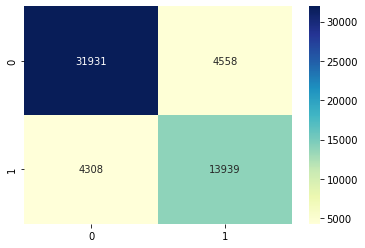

In [ ]:
lgbm_tuned = LGBMClassifier(**lgbm_params, n_estimators=100000)

lgbm_tuned.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='binary', eval_set=[(X_valid, y_valid)], verbose=True)
y_pred_lgbm = lgbm_tuned.predict(X_valid)

get_clf_eval(y_train, lgbm_tuned.predict(X_train))


정확도: 0.7471
정밀도: 0.6197
재현율: 0.6252
AUC: 0.7167
F1: 0.7162


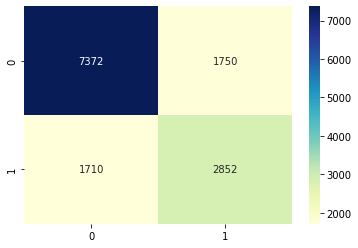

In [ ]:
get_clf_eval(y_valid, y_pred_lgbm)


정확도: 0.7473
정밀도: 0.6222
재현율: 0.6163
AUC: 0.7146
F1: 0.7151


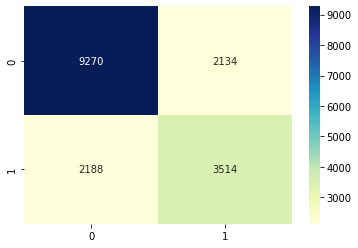

In [ ]:
get_clf_eval(y_test, lgbm_tuned.predict(X_test))

In [ ]:
lgbm_tuned = LGBMClassifier(**lgbm_params, n_estimators=1208)

lgbm_tuned.fit(X, y)

LGBMClassifier(colsample_bytree=0.96, learning_rate=0.01, max_depth=9,
               min_child_samples=38, n_estimators=1208, num_leaves=409,
               random_state=29, scale_pos_weight=1.5)


정확도: 0.8161
정밀도: 0.7181
재현율: 0.7380
AUC: 0.7966
F1: 0.7945


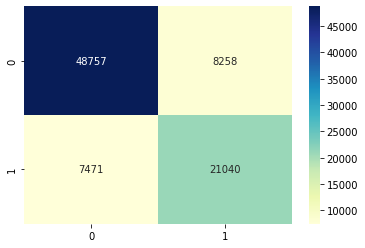

In [ ]:
get_clf_eval(y, lgbm_tuned.predict(X))

# LOFO

가장 잘 나온 모델을 기준으로 진행

LGBMClassifier(colsample_bytree=0.96, learning_rate=0.01, max_depth=9,
               min_child_samples=38, n_estimators=1208, num_leaves=409,
               random_state=29, scale_pos_weight=1.5)

In [ ]:
features = list(X.columns)

In [ ]:
f1_scores = []

for col in features:
    cur_lgbm = LGBMClassifier(colsample_bytree=0.96, learning_rate=0.01, max_depth=9, min_child_samples=38, n_estimators=1208, num_leaves=409, random_state=29, scale_pos_weight=1.5)
    col_list = list(X_train.columns.difference([col]))
    cur_lgbm.fit(X_train[col_list], y_train)
    cur_score = f1_score(y_test, cur_lgbm.predict(X_test[col_list]), average='macro')
    f1_scores.append((cur_score, col))

f1_scores.sort()
f1_scores

[(0.6433023700089067, 'total_rec_int'),
 (0.6911544791753665, 'total_rec_late_fee'),
 (0.6983929611330533, 'int_rate'),
 (0.7147122641428529, 'verification_status3'),
 (0.7148864250452837, 'revol_bal'),
 (0.7151131374564932, 'purpose13'),
 (0.7152501850804223, 'delinq_2yrs'),
 (0.7153170620367884, 'dti'),
 (0.7153796014257539, 'installment'),
 (0.7157273925735546, 'purpose9'),
 (0.7159327092852548, 'home_ownership6'),
 (0.7162007859150693, 'total_acc'),
 (0.7163060360743303, 'tot_cur_bal'),
 (0.7163701415084035, 'collections_12_mths_ex_med'),
 (0.7163701415084035, 'verification_status1'),
 (0.7164352171830992, 'pub_rec'),
 (0.7165301712593122, 'tax_liens'),
 (0.7165393037966901, 'annual_inc'),
 (0.7165583599607407, 'purpose10'),
 (0.7167184180603071, 'chargeoff_within_12_mths'),
 (0.7167862126262028, 'purpose3'),
 (0.7167969385040516, 'home_ownership5'),
 (0.7168029275449177, 'purpose7'),
 (0.7168367967072771, 'term1'),
 (0.7168472241689627, 'tot_coll_amt'),
 (0.7168754497901761, 'purp

In [ ]:
test_case = []

for case in f1_scores:
    if case[0] > 0.7151:
        test_case.append((case[1], case[0]))

test_case

[('purpose13', 0.7151131374564932),
 ('delinq_2yrs', 0.7152501850804223),
 ('dti', 0.7153170620367884),
 ('installment', 0.7153796014257539),
 ('purpose9', 0.7157273925735546),
 ('home_ownership6', 0.7159327092852548),
 ('total_acc', 0.7162007859150693),
 ('tot_cur_bal', 0.7163060360743303),
 ('collections_12_mths_ex_med', 0.7163701415084035),
 ('verification_status1', 0.7163701415084035),
 ('pub_rec', 0.7164352171830992),
 ('tax_liens', 0.7165301712593122),
 ('annual_inc', 0.7165393037966901),
 ('purpose10', 0.7165583599607407),
 ('chargeoff_within_12_mths', 0.7167184180603071),
 ('purpose3', 0.7167862126262028),
 ('home_ownership5', 0.7167969385040516),
 ('purpose7', 0.7168029275449177),
 ('term1', 0.7168367967072771),
 ('tot_coll_amt', 0.7168472241689627),
 ('purpose14', 0.7168754497901761),
 ('purpose2', 0.7169570295160743),
 ('emp_length', 0.7170249930896903),
 ('purpose8', 0.7171391894736507),
 ('purpose6', 0.7171735488408634),
 ('delinq_amnt', 0.7173618870682383),
 ('acc_now_del

## funded amnt를 제거한 model

In [ ]:
remain_col = list(X_train.columns.difference(['funded_amnt']))
remove_funded_amnt = LGBMClassifier(colsample_bytree=0.96, learning_rate=0.01, max_depth=9, min_child_samples=38, n_estimators=1208, num_leaves=409, random_state=29, scale_pos_weight=1.5)

remove_funded_amnt.fit(X[remain_col], y)

LGBMClassifier(colsample_bytree=0.96, learning_rate=0.01, max_depth=9,
               min_child_samples=38, n_estimators=1208, num_leaves=409,
               random_state=29, scale_pos_weight=1.5)

# 최종 제출



이미 가중치를 준 모델이므로 별도의 threshold는 사용하지 않음

In [ ]:
# 제출 양식 다운로드
submit = pd.read_csv('./data/sample_submission.csv')

test_df = pd.read_csv('./data/test.csv')
test_df = make_dataframe(test_df, train=False)

# 스케일링
scaled_features = scaler.transform(test_df[norm_target_features])
test_df[norm_target_features] = scaled_features

# prediction 수행
y_pred_prob = remove_funded_amnt.predict_proba(test_df[remain_col])

submit['answer'] = y_pred_prob[:,1]>0.5
submit['answer'] = submit['answer'].map({True: 1, False: 0})

# 제출 파일 저장
submit.to_csv('prediction(final).csv', index=False)